In [ ]:
import pandas as pd
df=pd.read_csv("Titanic-Dataset.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop(["PassengerId","Name","Ticket","Cabin","Embarked","Fare"],axis=1,inplace=True)


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0


In [ ]:
df=pd.get_dummies(df,columns=['Sex','Pclass'])
df.dropna(inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,False,True,False,False,True
1,1,38.0,1,0,True,False,True,False,False
2,1,26.0,0,0,True,False,False,False,True
3,1,35.0,1,0,True,False,True,False,False
4,0,35.0,0,0,False,True,False,False,True


In [ ]:
df.corr()["Survived"].sort_values(ascending=False)

,Survived
Survived,1.000000
Sex_female,0.538826
Pclass_1,0.301831
Parch,0.093317
Pclass_2,0.084753
SibSp,-0.017358
Age,-0.077221
Pclass_3,-0.337587
Sex_male,-0.538826


In [ ]:
df.drop(["Parch","SibSp"],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

scaler = StandardScaler()
x[['Age']] = scaler.fit_transform(x[['Age']])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1234)



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model=Sequential()
model.add(Dense(32,activation="relu",input_dim=6))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313 (5.13 KB)

 Trainable params: 1,313 (5.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=20)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4544 - loss: 0.7221 - val_accuracy: 0.6783 - val_loss: 0.6649
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6941 - loss: 0.6254 - val_accuracy: 0.6853 - val_loss: 0.6136
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7634 - loss: 0.5783 - val_accuracy: 0.7343 - val_loss: 0.5609
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7872 - loss: 0.5319 - val_accuracy: 0.7552 - val_loss: 0.5138
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7825 - loss: 0.4869 - val_accuracy: 0.7622 - val_loss: 0.4880
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8317 - loss: 0.4140 - val_accuracy: 0.8042 - val_loss: 0.4689
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8227 - loss: 0.3969 - val_accuracy: 0.7762 - val_loss: 0.4711
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7960 - loss: 0.4352 - val_accuracy: 0.7552 - val_loss

[]

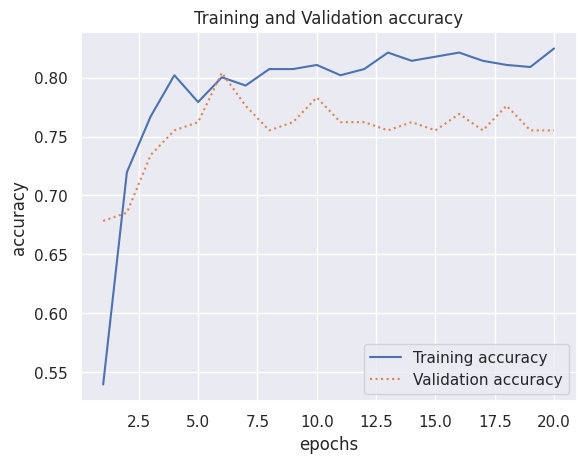

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
acc=hist.history['accuracy']
val=hist.history['val_accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,"-",label="Training accuracy")
plt.plot(epochs,val,":",label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.plot()

In [ ]:
scores=model.evaluate(x_test,y_test,verbose=0)
print(f'accuracy:{scores[1]:.1%}')

accuracy:75.5%


In [ ]:
scores=model.evaluate(x_test,y_test)
print(f'accuracy:{scores[1]:.1%}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7470 - loss: 0.4607 
accuracy:75.5%


In [ ]:
import numpy as np
age = scaler.transform([[30]])[0][0]
input = np.array([[age, 1, 0, 1, 0, 0]])
probability = model.predict(input)[0][0]
print(f'Probability of survival: {probability:.1%}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Probability of survival: 97.5%


In [ ]:
age = scaler.transform([[60]])[0][0]
input = np.array([[age, 0, 1, 0, 0, 1]])
probability = model.predict(input)[0][0]
print(f'Probability of survival: {probability:.1%}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Probability of survival: 5.1%
